In [8]:
! pip install opencv-python

   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 140.3 kB/s eta 0:04:36
   ---------------------------------------- 0.0/38.6 MB 140.3 kB/s eta 0:04:36
   ---------------------------------------- 0.0/38.6 MB 140.3 kB/s eta 0:04:36
   ---------------------------------------- 0.1/38.6 MB 228.2 kB/s eta 0:02:49
   ---------------------------------------- 0.2/38.6 MB 461.0 kB/s eta 0:01:24
   ---------------------------------------- 0.3/38.6 MB 698.2 kB/s eta 0:00:55
    --------------------------------------- 0.5/38.6 MB 994.2 kB/s eta 0:00:39
    -----------------------

In [9]:
import os, glob
import nibabel as nib
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [10]:
dataInputPath = r'D:\data\Train Segmentation'


maskPathInput = os.path.join(dataInputPath, 'mask/')

dataOutputPath = r'D:\data\slice'
maskSliceOutput = os.path.join(dataOutputPath, 'masknn/')

# STEP 2 - Image normalization
HOUNSFIELD_MIN = -50
HOUNSFIELD_MAX = 450
HOUNSFIELD_RANGE = HOUNSFIELD_MAX-HOUNSFIELD_MIN

# STEP 3 - Slicing and saving
SLICE_X = False
SLICE_Y = False
SLICE_Z = True

SLICE_DECIMATE_IDENTIFIER = 3

In [11]:
# Load image mask and see max min Hounsfield units
maskPath = os.path.join(maskPathInput, 'volume-1.nii')
mask = nib.load(maskPath).get_fdata()
np.min(mask), np.max(mask), mask.shape, type(mask)

(0.0, 2.0, (512, 512, 123), numpy.memmap)

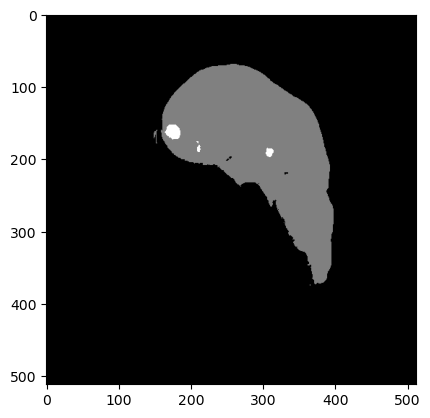

In [4]:
# # Show mask slice
imgSlice = mask[:,:,60]
plt.imshow(imgSlice, cmap='gray')
plt.show()

In [14]:
def normalizeMaskIntensityRange(mask):
    MIN_MASK_VALUE = 0
    MAX_MASK_VALUE = 2
    
    mask[mask < MIN_MASK_VALUE] = MIN_MASK_VALUE
    mask[mask > MAX_MASK_VALUE] = MAX_MASK_VALUE
    return (mask - MIN_MASK_VALUE) / (MAX_MASK_VALUE - MIN_MASK_VALUE)

normalized_mask = normalizeMaskIntensityRange(mask)
binary_mask = (normalized_mask > 0.5).astype(np.uint8)

In [15]:
def readMaskVolume(maskPath, normalize=False):
    mask = nib.load(maskPath).get_fdata()
    if normalize:
        return normalizeMaskIntensityRange(mask)
    else:
        return mask
    
readMaskVolume(maskPath, normalize=False)

memmap([[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [12]:
def saveSlice(img, fname, slice_number, path):
    img = np.uint8(img * 255)
    fout = os.path.join(path, f'{fname}_slice{str(slice_number).zfill(SLICE_DECIMATE_IDENTIFIER)}.png')
    cv2.imwrite(fout, img)
    print(f'[+] Slice saved: {fout}', end='\r')

Mask Min-Max Before Normalization: 0.0, 2.0
Mask Min-Max After Normalization: 0.0, 1.0


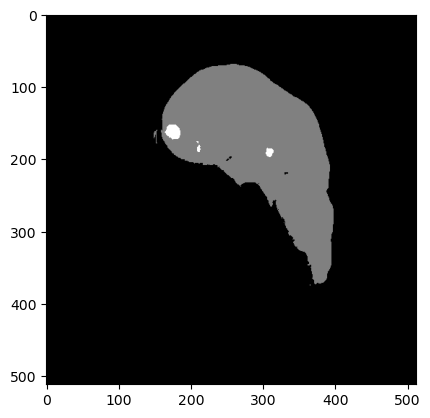

In [8]:
#Debugg
print(f"Mask Min-Max Before Normalization: {np.min(mask)}, {np.max(mask)}")
normalized_mask = normalizeMaskIntensityRange(mask)

print(f"Mask Min-Max After Normalization: {np.min(normalized_mask)}, {np.max(normalized_mask)}")
plt.imshow(normalized_mask[:,:,60], cmap='gray')
plt.show()

# Save
saveSlice(normalized_mask[:,:,61], 'test_mask', 61, maskSliceOutput)

In [9]:
# Slice and save mask volume
def sliceAndSaveVolumeImage(vol, fname, path):
    (dimx, dimy, dimz) = vol.shape
    print(dimx, dimy, dimz)
    cnt = 0
    
    if SLICE_Z:
        cnt += dimz
        print('Slicing Z: ')
        for i in range(dimz):
            saveSlice(vol[:,:,i], fname, i, path)
    return cnt

In [10]:
# Read and process mask volumes
for filename in sorted(glob.iglob(os.path.join(maskPathInput, '*.nii'))):
    img = readMaskVolume(filename, True)
    print(filename, img.shape, np.sum(img.shape), np.min(img), np.max(img))
    
    # Get the base filename without the extension
    base_filename = os.path.splitext(os.path.basename(filename))[0]
    
    # Create a folder with the same name as the file
    output_folder = os.path.join(maskSliceOutput, base_filename)
    os.makedirs(output_folder, exist_ok=True)
    
    numOfSlices = sliceAndSaveVolumeImage(img, base_filename, output_folder)
    
    print(f'\n{filename}, {numOfSlices} slices created in {output_folder}\n')


D:\data\Train Segmentation\mask\volume-0.nii (512, 512, 75) 1099 0.0 1.0
512 512 75
Slicing Z: 
[+] Slice saved: D:\data\slice\mask/volume-0\volume-0_slice074.png
D:\data\Train Segmentation\mask\volume-0.nii, 75 slices created in D:\data\slice\mask/volume-0

D:\data\Train Segmentation\mask\volume-1.nii (512, 512, 123) 1147 0.0 1.0
512 512 123
Slicing Z: 
[+] Slice saved: D:\data\slice\mask/volume-1\volume-1_slice122.png
D:\data\Train Segmentation\mask\volume-1.nii, 123 slices created in D:\data\slice\mask/volume-1

D:\data\Train Segmentation\mask\volume-2.nii (512, 512, 517) 1541 0.0 1.0
512 512 517
Slicing Z: 
[+] Slice saved: D:\data\slice\mask/volume-2\volume-2_slice516.png
D:\data\Train Segmentation\mask\volume-2.nii, 517 slices created in D:\data\slice\mask/volume-2

D:\data\Train Segmentation\mask\volume-3.nii (512, 512, 534) 1558 0.0 1.0
512 512 534
Slicing Z: 
[+] Slice saved: D:\data\slice\mask/volume-3\volume-3_slice533.png
D:\data\Train Segmentation\mask\volume-3.nii, 534 sl